# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math as m
from math import pi


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(' ')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## Map generators

Here we can see a tool that generates the coordinates of the cities in the required way.

The obtained values for the Xs and Ys can be then copied on a .map.in file via an InputMap() function, that the algorithm can use to set his own map


-0.734185 -0.678949
-0.612078 0.790797
-0.58802 0.808846
0.991611 -0.129256
0.13453 -0.990909
0.996959 -0.077928
0.423076 0.906094
-0.222989 -0.974821
0.553607 0.832778
0.728317 0.68524
-0.752274 0.65885
-0.984245 -0.17681
0.906182 -0.422887
0.313547 -0.949573
-0.506972 0.861962
0.958472 0.285185
0.520989 0.853563
0.666752 0.74528
0.52476 0.851251
0.999711 0.024054
0.873605 -0.486636
0.836804 -0.547503
0.906284 0.422668
-0.999772 -0.021376
-0.964801 -0.26298
0.936816 -0.349822
0.71052 -0.703677
0.992645 -0.121063
-0.700867 0.713292
0.990935 0.134344
0.791975 -0.610554
-0.518116 0.85531
0.315924 -0.948784
-0.907848 -0.419299


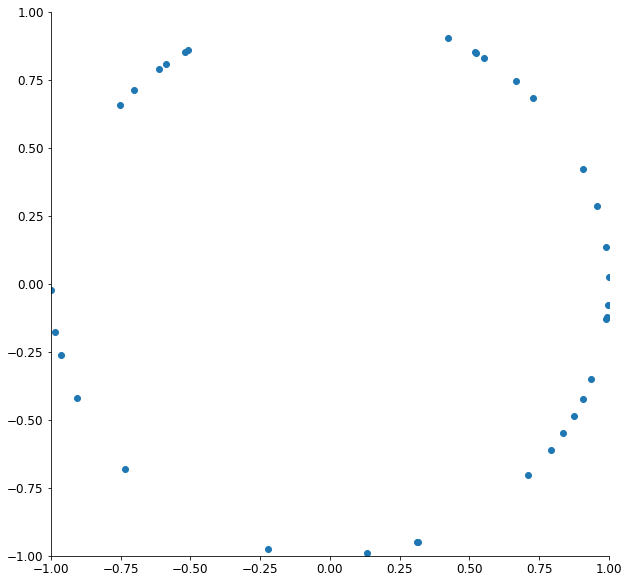

In [2]:
##random cities on circle generator
fig,ax = plt.subplots(1,figsize=(10,10))
n_cities=34
r=1
cityxy=np.zeros((n_cities,2))
X=np.zeros(n_cities)
Y=np.zeros(n_cities)
for city in cityxy:
    angle=2*np.random.uniform()*m.pi
    city[0]=round(r*m.cos(angle),6)
    city[1]=round(r*m.sin(angle),6)
    print(city[0],city[1])
for i in range(n_cities):
    X[i]= cityxy[i][0]
    Y[i]= cityxy[i][1]
ax.scatter(X,Y)
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)
plt.show()

0.823254 0.937576
0.895127 0.65489
0.07808 0.469202
0.313035 0.421555
0.633546 0.226148
0.191296 0.835845
0.67419 0.756274
0.784717 0.848791
0.639093 0.534626
0.636977 0.189356
0.850256 0.35447
0.941159 0.918659
0.654035 0.352642
0.65756 0.223872
0.53346 0.916581
0.260516 0.842027
0.340579 0.552987
0.286021 0.26436
0.24102 0.311199
0.142282 0.906683
0.95596 0.366884
0.580778 0.808395
0.984203 0.524891
0.105067 0.351263
0.390511 0.835276
0.076441 0.815684
0.824433 0.343478
0.026897 0.151264
0.669547 0.058137
0.908605 0.455059
0.963888 0.754474
0.42856 0.078067
0.705368 0.553507
0.923925 0.127104


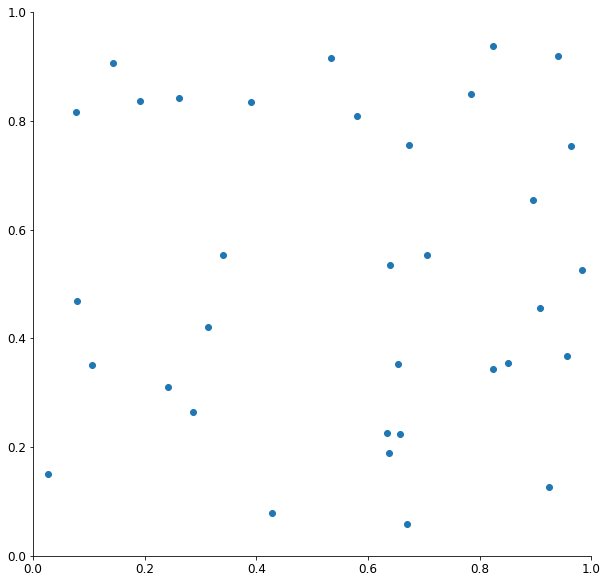

In [3]:
##random cities inside square generator
fig,ax = plt.subplots(1,figsize=(10,10))
n_cities=34
a=1
cityxy=np.zeros((n_cities,2))
X=np.zeros(n_cities)
Y=np.zeros(n_cities)
for city in cityxy:
    city[0]=round(a*np.random.uniform(),6)
    city[1]=round(a*np.random.uniform(),6)
    print(city[0],city[1])
for i in range(n_cities):
    X[i]= cityxy[i][0]
    Y[i]= cityxy[i][1]
ax.scatter(X,Y)
ax.set_xlim(0,a)
ax.set_ylim(0,a)
plt.show()

### No-crossing-over implementation

We start by testing our algorithm on 10 cities on a circle, where the solution is intuitive.

We'll start by using a dirty implementation:
 - We generate a population and measure fitness;
 - We destroy the least fit individuals (those with length over the average);
 - We fill the population with new random geni;
 - We mutate the remaining individuals;
 
We repeat those instructions and keep the best gene overall. 
 
We notice that we had better not to mutate too much the best gene of a generation, to avoid losing a good path, yet we don't want to keep it unaltered. We might define a function that increase the rate of mutation depending on where the individual lies on the range of lenghts:

$$R_i(L) = R_0 + (R_{max}-R_0)\left(\frac{L_i-L_{min}}{L_{max}-L_{min}}\right)  $$

We'll let our evolution run on 30 chromosoma for 500 generations.
Here we set $R_0 = 0.2$ and $R_{max} =0.5$

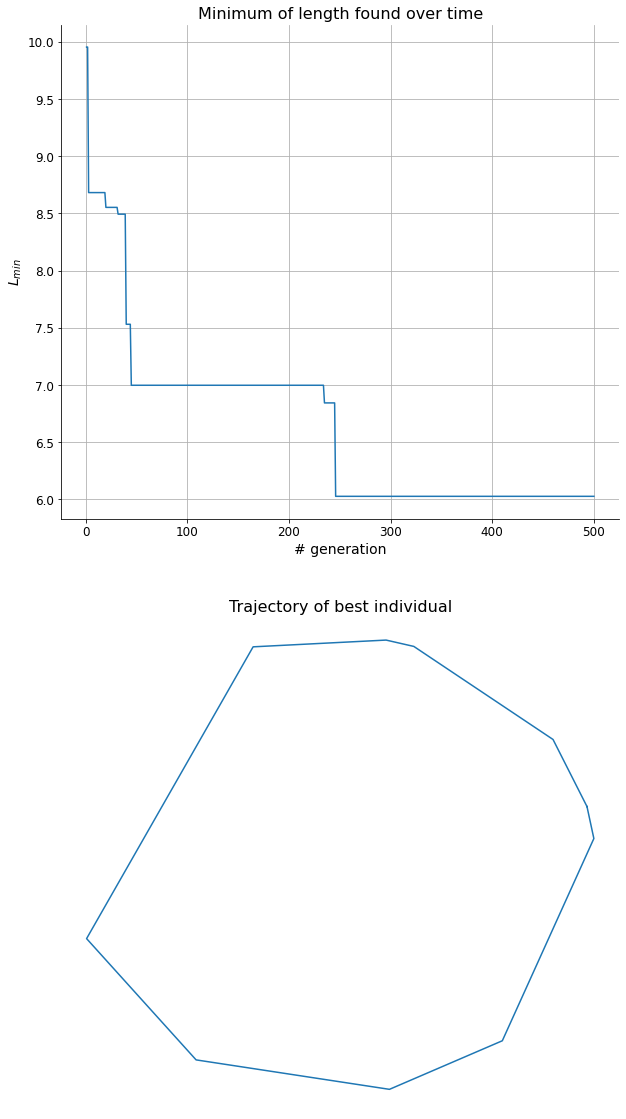

In [24]:
fig,ax = plt.subplots(2,figsize=(10,20))
f=open("bestdist10.dat",'r')
data=f2plot(f,2,500)
ax[0].set_title('Minimum of length found over time')
ax[0].plot(data[0],data[1])
ax[0].set_xlabel('# generation')
ax[0].set_ylabel('$L_{min}$')
ax[0].grid(True)

f=open("xybest10.dat",'r')
data=f2plot(f,2,11)
ax[1].set_title("Trajectory of best individual")
ax[1].plot(data[0],data[1])
ax[1].axis('off')
ax[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

Already without crossing over, we notice that the algorithm converges fast enough to the solution, or at least trying less configuration compared to a brute force case.

In fact, if we have $10$ cities and fix the first, we have $ \frac{9!}{2} = \frac{362880}{2} = 181440 $ possible trips (clock-wise and counter-clock-wise trips have same length).

In this implementation, the algorithm found the solution after $\sim 250$ generation. Each generation will try a number of configuration equal to the number of chromosoma.

The algorithm therefore found the solution exploring $250 \times 30 = 7500$ trips, which is around 24 times better. 

### Implementation with crossing-over
We will now add a crossing-over operator to our algorithm, and apply it to a map of 34 cities. The total number of trips possible is $\frac{33!}{2} \simeq 4.34 \times 10^{34}$.

After generating an initial population, for each generation the algorithm:
  - We'll select two random individuals,and apply crossover between those 2 with a probability of 70%;
  - With probability 30% we'll just copy those 2 individuals in the offspring;
  - After having filled the offspring with N individuals, we mutate them, selecting a random chromosome and applying a pair permutation  with a probability of 10%, we do this once for every gene in the popoulation;
  - We perform measurements and store the best individual.
  
To select the parents for the offspring, we'll use a probability of the form $ P_i =e^{-\beta L_i}$. Each time we'll have to change parents, we'll select a random chromosoma and take that as parent with $ P = min(1,e^{-\beta \Delta L})$. We do this for both parents. If we happen ,by accident, to select as parent the same individual twice, we'll extract a new one. If too many tries are made, a random gene that is not the other parent will be chosen without fitness check.

We note that is more beneficial to increase the number of chromosoma than the number of generations.

Here are the results for the circular case, we will use $N=400$ chromosoma and $\beta = 20$.

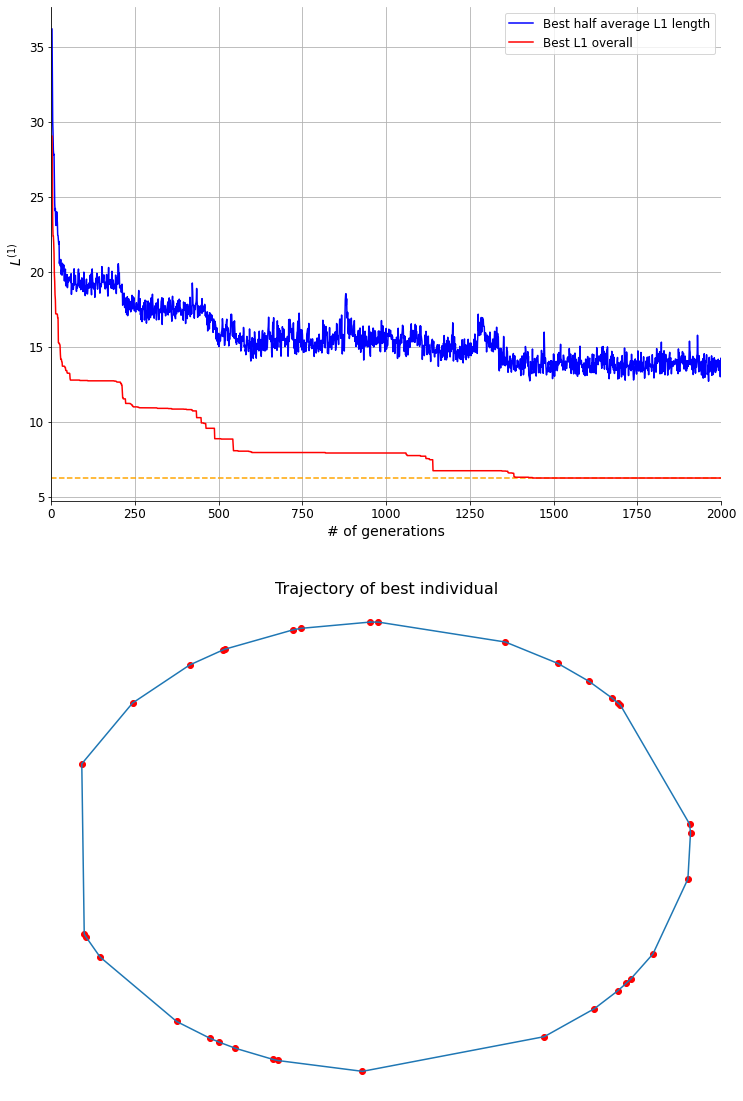

In [42]:
fig,ax = plt.subplots(2,figsize=(12,20))
ax[0].axhline(6.23401,linestyle='--',color='orange')
f=open("besthalf_l1_34c.dat",'r')
data=f2plot(f,2,49999)
f=open("bestdist34c.dat",'r')
data2=f2plot(f,2,49999)
ax[0].plot(data2[0],data[0],label='Best half average L1 length',color='blue')
ax[0].plot(data2[0],data2[1],label='Best L1 overall',color='red')
ax[0].set_xlim([0,2000])
ax[0].set_xlabel('# of generations')
ax[0].set_ylabel('$L^{(1)}$')
ax[0].grid(True)
ax[0].legend()

f=open("xybest34c.dat",'r')
data=f2plot(f,2,35)
f=open("circle34.map.in",'r')
data2=f2plot(f,2,34)
ax[1].set_title("Trajectory of best individual")
ax[1].plot(data[0],data[1])
ax[1].scatter(data2[0],data2[1],color='red')
ax[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax[1].axis('off')

plt.show()

For the case of the random square distribution, we will not be able to check our result so easily, we'll then use some more brute force and set $N= 1500$ just to be sure.

We will use $\beta = 10$

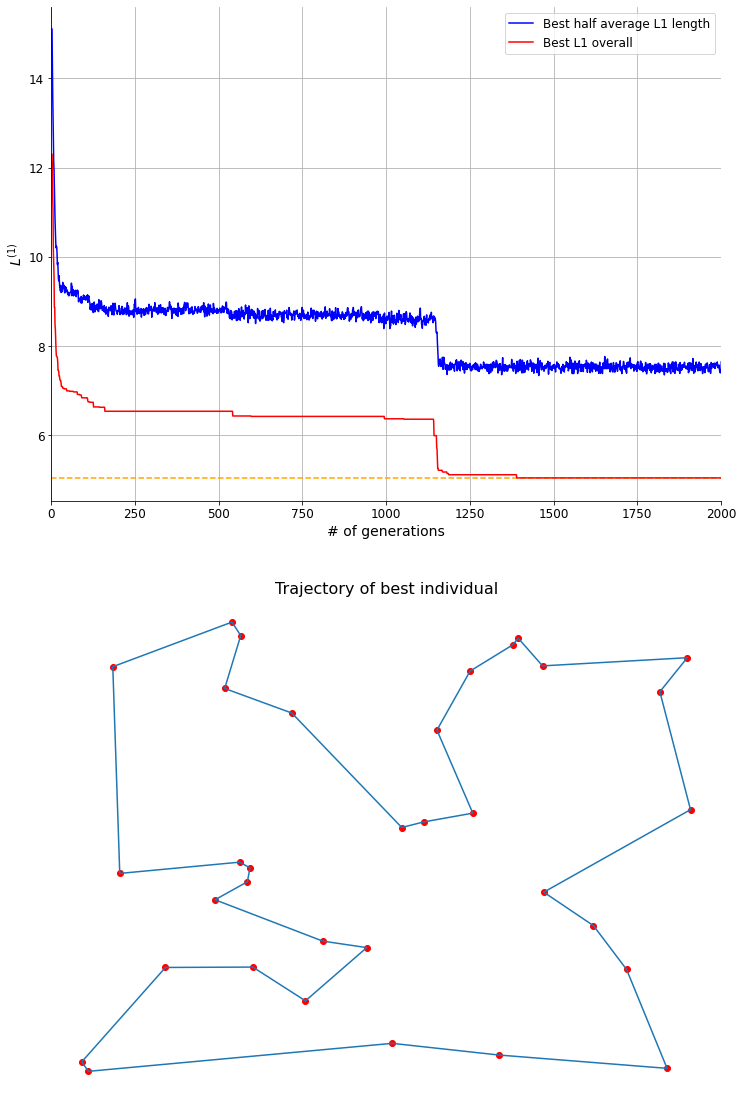

In [47]:
fig,ax = plt.subplots(2,figsize=(12,20))
ax[0].axhline(5.0341,linestyle='--',color='orange')
f=open("besthalf_l1_34s.dat",'r')
data=f2plot(f,2,6999)
f=open("bestdist34s.dat",'r')
data2=f2plot(f,2,6999)
ax[0].plot(data2[0],data[0],label='Best half average L1 length',color='blue')
ax[0].plot(data2[0],data2[1],label='Best L1 overall',color='red')
ax[0].set_xlim([0,2000])
ax[0].set_xlabel('# of generations')
ax[0].set_ylabel('$L^{(1)}$')
ax[0].grid(True)
ax[0].legend()

f=open("xybest34s.dat",'r')
data=f2plot(f,2,35)
f=open("square34.map.in",'r')
data2=f2plot(f,2,34)
ax[1].set_title("Trajectory of best individual")
ax[1].plot(data[0],data[1])
ax[1].scatter(data2[0],data2[1],color='red')
ax[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax[1].axis('off')

plt.show()